# summarize

In [1]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from string  import punctuation 
import tkinter as tk
from tkinter import *
from tkinter import ttk ,messagebox
from tkinter.scrolledtext import *
import tkinter.filedialog
from collections import Counter
from googletrans import Translator
from tkinter import messagebox


In [2]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
def get_summarize(): 
    text = str(entry.get('1.0', tk.END))
    doc=nlp(text)
    tokens = [token.text.lower() for token in doc # extract the text and conver it to lowercase 
              if not token.is_stop and  # not stopwords
              not token.is_punct and token.text !="\n" ]    # not punctuation        # not \n
    
    
    
    tokens1=[]

    stopwords = list(STOP_WORDS)
        
    allowed_pos = ['ADJ', 'PROPN', 'VERB', 'NOUN']

    for token in doc:

            if token.text in stopwords or token.text in punctuation:
                continue

            if token.pos_ in allowed_pos:
                
                tokens1.append(token.text)
                
                
    from collections import Counter            
    word_freq = Counter(tokens)
    max_freq = max(word_freq.values())
    for word in word_freq.keys():
        
        word_freq[word] = word_freq[word]/max_freq
        
        
        
    sent_token = [sent.text for sent in doc.sents]
    
    sent_score = {}

    for sent in sent_token: # iterates over each sentence 

        for word in sent.split(): #The inner loop splits each sentence into words using split()

            if word.lower() in word_freq.keys(): # it checks if the lowercase version of the word is in the word_freq dictionary

                if sent not in sent_score.keys():

                    sent_score[sent] = word_freq[word] #If the sentence (sent) is not already a key in sent_score, 
                                                        #it initializes its score to the frequency of the current word.
                        
                                                        #If the sentence is already in sent_score, 
                                                        #it adds the frequency of the current word to its existing score.
                else:

                     sent_score[sent] += word_freq[word]

    from heapq import nlargest

    num_sentences = 2

    n = nlargest(num_sentences, sent_score, key=sent_score.get)

    " ".join(n)  # separating each sentence by a space.
    result = '\nSummary: {}'.format(n)
    tab1_display.insert(tk.END, result)
    

In [4]:
def get_file_summary():
    text = displayed_file.get('1.0',tk.END)
    doc=nlp(text)
    tokens = [token.text.lower() for token in doc # extract the text and conver it to lowercase 
              if not token.is_stop and  # not stopwords
              not token.is_punct and token.text != " \n " ]    # not punctuation        # not \n
    
    
    
    tokens1=[]

    stopwords = list(STOP_WORDS)
        
    allowed_pos = ['ADJ', 'PROPN', 'VERB', 'NOUN']

    for token in doc:

            if token.text in stopwords or token.text in punctuation:
                continue

            if token.pos_ in allowed_pos:
                
                tokens1.append(token.text)
                
                
    from collections import Counter            
    word_freq = Counter(tokens)
    max_freq = max(word_freq.values())
    for word in word_freq.keys():
        
        word_freq[word] = word_freq[word]/max_freq
        
        
        
    sent_token = [sent.text for sent in doc.sents]
    
    sent_score = {}

    for sent in sent_token: # iterates over each sentence 

        for word in sent.split(): #The inner loop splits each sentence into words using split()

            if word.lower() in word_freq.keys(): # it checks if the lowercase version of the word is in the word_freq dictionary

                if sent not in sent_score.keys():

                    sent_score[sent] = word_freq[word] #If the sentence (sent) is not already a key in sent_score, 
                                                        #it initializes its score to the frequency of the current word.
                        
                                                        #If the sentence is already in sent_score, 
                                                        #it adds the frequency of the current word to its existing score.
                else:

                     sent_score[sent] += word_freq[word]

    from heapq import nlargest

    num_sentences = 2

    n = nlargest(num_sentences, sent_score, key=sent_score.get)

    "  ".join(n)  # separating each sentence by a space
    
    result = '\nSummary:{}'.format(n)
    tab2_display_text.insert(tk.END,result)

# Sentiment Analysis

In [5]:
!pip install -i https://pypi.anaconda.org/berber/simple tweet-preprocessor  #remove URLs, hashtags 
!pip install wordcloud
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install scikit-learn

ERROR: Invalid requirement: '#remove'


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


ERROR: unknown command "install textblob" - maybe you meant "install"



In [6]:
# disable warning
import warnings
warnings.filterwarnings('ignore') #suppresses all warnings that are normally issued by Python
import pandas as pd
df = pd.read_csv('twitter_sentiment.csv', header=None, index_col=[0])
#index_col=[0] specifies that the first column should be used as the index of the DataFrame.
df = df[[2,3]].reset_index(drop=True)
#resets the index of the DataFrame, dropping the old index and generating a new one starting from 0.
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [9]:

df.dropna(inplace=True) #removes any rows with missing values

In [10]:
df['sentiment'].value_counts()

sentiment
Negative      22624
Positive      20932
Neutral       18393
Irrelevant    13047
Name: count, dtype: int64

<Axes: ylabel='count'>

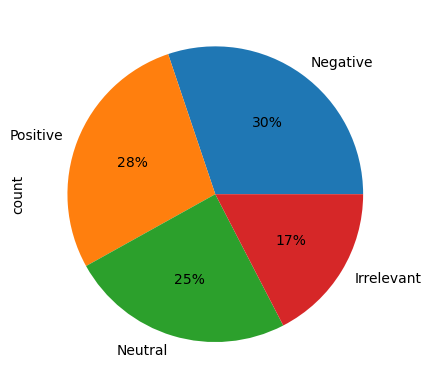

In [11]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')


In [12]:
X=df["text"]
y=df["sentiment"]

In [13]:
import preprocessor as p  #remove URLs, hashtags 
X_preprocessed = X.apply(lambda tweet: p.clean(tweet))# must be NaN

# RandomForestClassifier

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline#used to chain multiple estimators (such as transformers and classifiers)
#n_estimators=100: number of decision trees in the forest
#n_jobs=-1:the number of jobs to run in parallel for both fit and predict operations.
#Setting it to -1 means that all available CPU cores will be used.

In [15]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((59996,), (15000,))

In [16]:
stopwords = list(STOP_WORDS)
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['does', 'than', 'hereupon',
                                             'together', 'amount', 'seem',
                                             'same', 'alone', 'you', 'even',
                                             'name', 'since', 'various', 'well',
                                             'hundred', 'none', 'fifteen',
                                             'until', 'other', 'his', 'was',
                                             'mostly', 'latterly', 'throughout',
                                             'either', 'therefore', 'the',
                                             'however', 'did', "'m", ...])),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [17]:
# evaluation
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9121333333333334


# LogisticRegression

In [18]:
# model building
from sklearn.linear_model import LogisticRegression
stopwords = list(STOP_WORDS)
model= Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('model',LogisticRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['does', 'than', 'hereupon',
                                             'together', 'amount', 'seem',
                                             'same', 'alone', 'you', 'even',
                                             'name', 'since', 'various', 'well',
                                             'hundred', 'none', 'fifteen',
                                             'until', 'other', 'his', 'was',
                                             'mostly', 'latterly', 'throughout',
                                             'either', 'therefore', 'the',
                                             'however', 'did', "'m", ...])),
                ('model', LogisticRegression())])

In [19]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7930666666666667


In [20]:
def Sentiment_Analysis():
    text = entry.get('1.0',tk.END)
    x=clf.predict([text])
    tab1_display.insert(tk.END, x)

In [21]:
def Sentiment_Analysis_file():
    text = displayed_file.get('1.0',tk.END)
    x=clf.predict([text])
    tab2_display_text.insert(tk.END,x)

# named entity recognition

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [23]:
# Load the dataset
dataset= pd.read_csv("ner_dataset.csv",encoding="latin1" )
dataset

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
...,...,...,...,...
1048570,NaN,they,PRP,O
1048571,NaN,responded,VBD,O
1048572,NaN,to,TO,O
1048573,NaN,the,DT,O


In [24]:
dataset =dataset.fillna(method ="ffill")

dataset["Sentence #"] = LabelEncoder().fit_transform(dataset["Sentence #"] )

dataset.dropna(inplace=True) #removes any rows with missing values

# Split the dataset into train and test sets
X = dataset["Word"]  # Input features (words)
y = dataset['Tag']  # Target variable (NER labels)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(encoding='latin-1', ngram_range=(1, 2),stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Check the shapes of X_train, X_test, y_train, y_test
X_tfidf.shape

(1048575, 30773)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
mod = regressor.fit(X_train,y_train)

In [28]:
from sklearn.metrics import accuracy_score
predictions = mod.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9226474024271034


In [29]:
from sklearn.tree import DecisionTreeClassifier
x = DecisionTreeClassifier()
moodel = x.fit(X_train,y_train)

In [30]:
from sklearn.metrics import accuracy_score
predictions = moodel.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9336385094056219


In [41]:
def ner():
    text = entry.get('1.0', tk.END)
    text_tokenized = word_tokenize(text)  # Tokenize the input text
    for word in text_tokenized:
        text_tfidf = tfidf.transform([word])  # Transform each tokenized word into TF-IDF vectors
        prediction = moodel.predict(text_tfidf)
        # Print the word along with its predicted NER label
        tab1_display.insert(tk.END, f"{word}: {prediction}\n")

In [43]:
def nerf():
    text = entry.get('1.0', tk.END)
    text_tokenized = word_tokenize(text)  # Tokenize the input text
    for word in text_tokenized:
        text_tfidf = tfidf.transform([word])  # Transform each tokenized word into TF-IDF vectors
        prediction = moodel.predict(text_tfidf)
        # Print the word along with its predicted NER label
        tab2_display_text.insert(tk.END, prediction )

# translation from english to arabic

In [46]:
import traceback

import numpy as np
import keras


batch_size = 64  # Batch size for training.
epochs = 160 # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.

## Prepare the data

# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open("ara_eng.txt", "r", encoding="utf-8") as f:
    lines = f.read().split("\n")
for line in lines[: min(num_samples, len(lines) - 1)]:
    parts = line.split("\t")
    if len(parts) != 2:  # Ensure that each line has two parts (input and target)
        continue  # Skip lines with incorrect format
    input_text, target_text = parts
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = "\t" + target_text + "\n"
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)




input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype="float32",
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype="float32",
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype="float32",
)
try:
    for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
        for t, char in enumerate(input_text):
            encoder_input_data[i, t, input_token_index[char]] = 1.0
        encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
        for t, char in enumerate(target_text):
            # decoder_target_data is ahead of decoder_input_data by one timestep
            decoder_input_data[i, t, target_token_index[char]] = 1.0
            if t > 0:
                # decoder_target_data will be ahead by one timestep
                # and will not include the start character.
                decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
        decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
        decoder_target_data[i, t:, target_token_index[" "]] = 1.0

    """
    ## Build the model
    """

    # Define an input sequence and process it.
    encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
    encoder = keras.layers.LSTM(latent_dim, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)

    # We discard encoder_outputs and only keep the states.
    encoder_states = [state_h, state_c]

    # Set up the decoder, using encoder_states as initial state.
    decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))

    # We set up our decoder to return full output sequences,
    # and to return internal states as well. We don't use the
    # return states in the training model, but we will use them in inference.
    decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
    decoder_outputs = decoder_dense(decoder_outputs)

    # Define the model that will turn
    # encoder_input_data & decoder_input_data into decoder_target_data
    model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

    """
    ## Train the model
    """
    #
    model.compile(
        optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    model.fit(
        [encoder_input_data, decoder_input_data],
        decoder_target_data,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
    )
    # Save model
    model.save("model_10.keras")


    # Define sampling models
    # Restore the model and construct the encoder and decoder.
    model = keras.models.load_model("model_10.keras")

    encoder_inputs = model.input[0]  # input_1
    encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
    encoder_states = [state_h_enc, state_c_enc]
    encoder_model = keras.Model(encoder_inputs, encoder_states)

    decoder_inputs = model.input[1]  # input_2
    decoder_state_input_h = keras.Input(shape=(latent_dim,))
    decoder_state_input_c = keras.Input(shape=(latent_dim,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_lstm = model.layers[3]
    decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
        decoder_inputs, initial_state=decoder_states_inputs
    )
    decoder_states = [state_h_dec, state_c_dec]
    decoder_dense = model.layers[4]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = keras.Model(
        [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
    )

    # Reverse-lookup token index to decode sequences back to
    # something readable.
    reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
    reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


    def decode_sequence(input_seq):
        # Encode the input as state vectors.
        states_value = encoder_model.predict(input_seq, verbose=0)

        # Generate empty target sequence of length 1.
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        # Populate the first character of target sequence with the start character.
        target_seq[0, 0, target_token_index["\t"]] = 1.0

        # Sampling loop for a batch of sequences
        # (to simplify, here we assume a batch of size 1).
        stop_condition = False
        decoded_sentence = ""
        while not stop_condition:
            output_tokens, h, c = decoder_model.predict(
                [target_seq] + states_value, verbose=0
            )

            # Sample a token
            sampled_token_index = np.argmax(output_tokens[0, -1, :])
            sampled_char = reverse_target_char_index[sampled_token_index]
            decoded_sentence += sampled_char

            # Exit condition: either hit max length
            # or find stop character.
            if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
                stop_condition = True

            # Update the target sequence (of length 1).
            target_seq = np.zeros((1, 1, num_decoder_tokens))
            target_seq[0, 0, sampled_token_index] = 1.0

            # Update states
            states_value = [h, c]
        return decoded_sentence


    """
    You can now generate decoded sentences as such:
    """

    for seq_index in range(50):
        # Take one sequence (part of the training set)
        # for trying out decoding.
        input_seq = encoder_input_data[seq_index : seq_index + 1]
        decoded_sentence = decode_sequence(input_seq)
        print("-")
        print("Input sentence:", input_texts[seq_index])
        print("Decoded sentence:", decoded_sentence)
except:
    traceback.print_exc()

Number of samples: 10000
Number of unique input tokens: 73
Number of unique output tokens: 107
Max sequence length for inputs: 44
Max sequence length for outputs: 67
Epoch 1/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.7177 - loss: 1.5652 - val_accuracy: 0.6236 - val_loss: 1.5705
Epoch 2/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.7555 - loss: 0.9858 - val_accuracy: 0.6225 - val_loss: 1.4523
Epoch 3/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.7607 - loss: 0.9210 - val_accuracy: 0.6311 - val_loss: 1.3844
Epoch 4/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.7792 - loss: 0.8436 - val_accuracy: 0.6669 - val_loss: 1.2624
Epoch 5/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.7882 - loss: 0.8111 - val_accuracy: 0.6710 - val_loss: 1.2368
Epoch 6/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.7940 - loss: 0.7804 - val_accuracy: 0.6837 - val_loss: 1.1959
Epoch 7/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 92m

125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.8569 - loss: 0.5149 - val_accuracy: 0.7464 - val_loss: 0.9344
Epoch 50/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.8584 - loss: 0.5096 - val_accuracy: 0.7482 - val_loss: 0.9285
Epoch 51/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.8592 - loss: 0.5055 - val_accuracy: 0.7472 - val_loss: 0.9324
Epoch 52/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8615 - loss: 0.4985 - val_accuracy: 0.7482 - val_loss: 0.9301
Epoch 53/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.8616 - loss: 0.4966 - val_accuracy: 0.7483 - val_loss: 0.9297
Epoch 54/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.8627 - loss: 0.4930 - val_accuracy: 0.7479 - val_loss: 0.9317
Epoch 55/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.8614 - loss: 0.4959 - val_accuracy: 0.7460 - val_loss: 0.9356
Epoch 56/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8638 - loss: 0.4

125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9006 - loss: 0.3580 - val_accuracy: 0.7444 - val_loss: 1.0468
Epoch 99/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9015 - loss: 0.3536 - val_accuracy: 0.7444 - val_loss: 1.0514
Epoch 100/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.9019 - loss: 0.3515 - val_accuracy: 0.7450 - val_loss: 1.0480
Epoch 101/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9029 - loss: 0.3485 - val_accuracy: 0.7424 - val_loss: 1.0623
Epoch 102/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9027 - loss: 0.3501 - val_accuracy: 0.7447 - val_loss: 1.0612
Epoch 103/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9032 - loss: 0.3464 - val_accuracy: 0.7439 - val_loss: 1.0651
Epoch 104/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9047 - loss: 0.3414 - val_accuracy: 0.7429 - val_loss: 1.0680
Epoch 105/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9049 

Epoch 147/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.9297 - loss: 0.2537 - val_accuracy: 0.7355 - val_loss: 1.2932
Epoch 148/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.9301 - loss: 0.2539 - val_accuracy: 0.7344 - val_loss: 1.2966
Epoch 149/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9306 - loss: 0.2525 - val_accuracy: 0.7357 - val_loss: 1.3038
Epoch 150/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9310 - loss: 0.2501 - val_accuracy: 0.7347 - val_loss: 1.3106
Epoch 151/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9309 - loss: 0.2497 - val_accuracy: 0.7352 - val_loss: 1.3174
Epoch 152/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.9311 - loss: 0.2491 - val_accuracy: 0.7339 - val_loss: 1.3240
Epoch 153/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9322 - loss: 0.2454 - val_accuracy: 0.7341 - val_loss: 1.3330
Epoch 154/160
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - ac

In [49]:
from nltk.tokenize import word_tokenize

# Function to tokenize text and translate it
def translate_text():
    # Get text from entry widget
    input_text = entry.get('1.0', tk.END)

    # Tokenize the input text into words
    input_words = word_tokenize(input_text)

    # Initialize an empty string for translated output
    translated_output = ""

    # Loop through each word in the input text
    for word in input_words:
        # Encode the word as one-hot vector
        encoder_input_data = np.zeros((1, len(word), num_encoder_tokens), dtype="float32")
        for t, char in enumerate(word):
            encoder_input_data[0, t, input_token_index[char]] = 1.0

        # Translate the word using the encoder-decoder model
        translated_word = decode_sequence(encoder_input_data)

        # Append the translated word to the output
        translated_output += translated_word
        
    tab1_display.insert(tk.END,translated_output)

In [ ]:
# Function to tokenize text and translate it
def translate_text_2():
    # Get text from entry widget
    input_text = entry.get('1.0', tk.END)

    # Tokenize the input text into words
    input_words = word_tokenize(input_text)

    # Initialize an empty string for translated output
    translated_output = ""

    # Loop through each word in the input text
    for word in input_words:
        # Encode the word as one-hot vector
        encoder_input_data = np.zeros((1, len(word), num_encoder_tokens), dtype="float32")
        for t, char in enumerate(word):
            encoder_input_data[0, t, input_token_index[char]] = 1.0

        # Translate the word using the encoder-decoder model
        translated_word = decode_sequence(encoder_input_data)

        # Append the translated word to the output
        translated_output += translated_word
        
    tab1_display.insert(tk.END,translated_output)

In [50]:
window = Tk()
window.title("Valorant Team")
window.geometry("900x500")
# TAB LAYOUT
tab_control = ttk.Notebook(window)
 
tab1 = ttk.Frame(tab_control)
tab2 = ttk.Frame(tab_control)

# ADD TABS TO NOTEBOOK
tab_control.add(tab1, text=f'{"Home":^20s}')
tab_control.add(tab2, text=f'{"File":^20s}')
tab_control.pack(expand=1, fill='both')


# MAIN NLP TAB
l1=Label(tab1,text="Enter Text")
l1.grid(row=1,column=1)

entry=ScrolledText(tab1,height=10,width=110)
entry.grid(row=2,column=0,columnspan=3,padx=5,pady=5)


def clear_text():
    entry.delete('1.0',END)
    
def clear_display_result():
    tab1_display.delete('1.0',END)
    
# Clear Text  with position 1.0
def clear_text_file():
    displayed_file.delete('1.0',END)

# Clear Result of Functions
def clear_text_result():
    tab2_display_text.delete('1.0',END)
    
    
# Functions for TAB 2 FILE PROCESSER
# Open File to Read and Process

def openfiles():
    file1 = tkinter.filedialog.askopenfilename(filetypes=(("Text Files",".txt"),("All files","*")))
    read_text = open(file1).read()
    displayed_file.insert(tk.END,read_text)

# BUTTONS
button1=Button(tab1,text="Reset",command=clear_text, width=12,bg='#c71585',fg='#fff')
button1.grid(row=4,column=1,padx=10,pady=10)

button2=Button(tab1,text="Summarize",command=get_summarize, width=12,bg='#c71585',fg='#fff')
button2.grid(row=4,column=0,padx=10,pady=10)

button3=Button(tab1,text="Clear Result", command=clear_display_result,width=12,bg='#c71585',fg='#fff')
button3.grid(row=4,column=2,padx=10,pady=10)

translate_button = Button(tab1, text="Translate!",width=12,command=translate_text,bg='#c71585',fg='#fff')
translate_button.grid(row=5, column=0, padx=10,pady=10)

b4=Button(tab1,text="analyse", width=12,command=Sentiment_Analysis,bg='#c71585',fg='#fff')
b4.grid(row=5,column=1,padx=10,pady=10)

b5=Button(tab1,text="ner", width=12,command=ner,bg='#c71585',fg='#fff')
b5.grid(row=5,column=2,padx=10,pady=10)




# BUTTONS FOR SECOND TAB/FILE READING TAB
b0=Button(tab2,text="Open File", width=12,command=openfiles,bg='#c71585',fg='#fff')
b0.grid(row=3,column=0,padx=10,pady=10)

b1=Button(tab2,text="Reset ", width=12,command=clear_text_file,bg='#c71585',fg='#fff')
b1.grid(row=3,column=1,padx=10,pady=10)

b2=Button(tab2,text="Summarize", width=12,command=get_file_summary,bg='#c71585',fg='#fff')
b2.grid(row=3,column=2,padx=10,pady=10)

b3=Button(tab2,text="Clear Result", width=12,command=clear_text_result,bg='#c71585',fg='#fff')
b3.grid(row=5,column=1,padx=10,pady=10)

b4=Button(tab2,text="Close", width=12,command=window.destroy,bg='#c71585',fg='#fff')
b4.grid(row=5,column=2,padx=10,pady=10)

translate_button = Button(tab2, text="Translate!", width=12,command=translate_text_2,bg='#c71585',fg='#fff')
translate_button.grid(row=5, column=0, padx=10,pady=10)

b5=Button(tab2,text="analyse", width=12,command=Sentiment_Analysis_file,bg='#c71585',fg='#fff')
b5.grid(row=3,column=3,padx=10,pady=10)

b5=Button(tab2,text="ner", width=12,command=nerf,bg='#c71585',fg='#fff')
b5.grid(row=5,column=3,padx=10,pady=10)




# Display Screen For Result
tab1_display = Text(tab1,height=10,width=110)
tab1_display.grid(row=7,column=0, columnspan=3,padx=5,pady=5)

displayed_file = ScrolledText(tab2,height=10,width=110)# Initial was Text(tab2)

displayed_file.grid(row=2,column=0, columnspan=4,padx=5,pady=3)


tab2_display_text = ScrolledText(tab2,height=10,width=110)
tab2_display_text.grid(row=7,column=0, columnspan=4,padx=5,pady=5)




window.mainloop()